# Name: Manish Shah
## Roll: 16
## Subject: Applied Machine Learning
### Assignment: A1: Write program in python that trains multivariate linear regression

In [50]:
import numpy as np

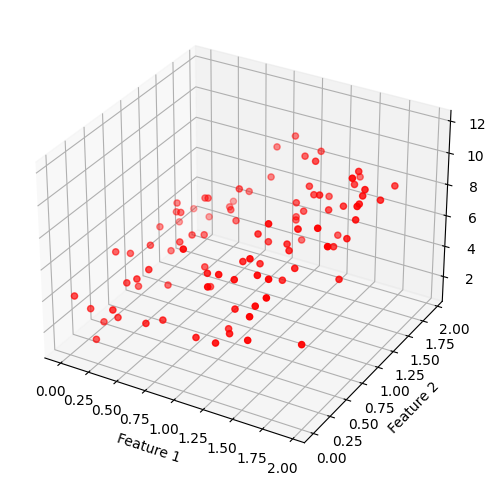

In [51]:
# Prepare toy set
# Use equation y = 2x1+2x2 + 5

np.random.seed(16)

# Generate random data
num_samples = 100
X = 2 * np.random.rand(100, 3)  # Generate 100 data points with 3 features
noise = np.random.randn(num_samples)   # Noise

# y = 4 + 3x1 + 1.5x2 - 2x3 + noise
y = 4 + np.dot(X, np.array([3, 1.5, -2])) + noise  # Generate target variable

# plot the graph
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c='red', marker='o')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
plt.show()

In [52]:
def linear_regression(X, y, alpha, epochs):
    m, n = X.shape
    theta = np.random.randn(n)
    for _ in range(epochs):
        y_pred = np.dot(X, theta)
        error = y_pred - y
        gradient = 2/m * np.dot(X.T, error)
        theta -= alpha * gradient
    return theta


In [53]:
# Standard Scaler
def standard_scaler(X):
    mean = np.mean(X, axis=0)
    std_dev = np.std(X, axis=0)
    X_scaled = (X - mean) / std_dev
    return X_scaled, mean, std_dev

# Compute Mean Squared Error (MSE) loss
def MSE(X, y, theta):
    m = len(y)
    y_pred = np.dot(X, theta)
    mse = np.sum((y_pred - y)**2) / m
    return mse

In [54]:
# Train the model
# Initialize learning rate & epoch
epochs = 100
alpha = 0.1
X_scaled, mean, std_dev = standard_scaler(X)
X_train = np.c_[np.ones((len(X_scaled), 1)), X_scaled]  # Add bias term
theta = linear_regression(X_train, y, alpha, epochs)

In [55]:
#Evaluate the model
X_test = np.array([[1, 2, 3]])  # Example test data
X_test_scaled = (X_test - mean) / std_dev
X_test_scaled = np.c_[np.ones((len(X_test_scaled), 1)), X_test_scaled]  # Add bias term
predicted_value = np.dot(X_test_scaled, theta)
print(f'Predicted Value: {predicted_value[0]}')


Predicted Value: 3.9964107075383764


In [56]:
#Compute and print the loss
X_train_scaled = np.c_[np.ones((len(X_scaled), 1)), X_scaled]  # Add bias term to training data
loss = MSE(X_train_scaled, y, theta)
print(f'Mean Squared Error (MSE): {loss}')


Mean Squared Error (MSE): 0.8238149616218321
